# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import nltk
import pandas as pd
import numpy as np
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from custom_transformer import StartingVerbExtractor
import pickle


nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to C:\Users\Somtochukwu
[nltk_data]     Avah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Somtochukwu
[nltk_data]     Avah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Somtochukwu Avah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Somtochukwu
[nltk_data]     Avah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Somtochukwu
[nltk_data]     Avah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table("messages", con=engine)
X = df['message']
Y = df.iloc[:, 4:]

C:\Users\Somtochukwu Avah\AppData\Local\Temp\ipykernel_2024\834676933.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Y.hist(ax = ax)


array([[<Axes: title={'center': 'related'}>,
        <Axes: title={'center': 'request'}>,
        <Axes: title={'center': 'offer'}>,
        <Axes: title={'center': 'aid_related'}>,
        <Axes: title={'center': 'medical_help'}>,
        <Axes: title={'center': 'medical_products'}>],
       [<Axes: title={'center': 'search_and_rescue'}>,
        <Axes: title={'center': 'security'}>,
        <Axes: title={'center': 'military'}>,
        <Axes: title={'center': 'child_alone'}>,
        <Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'food'}>],
       [<Axes: title={'center': 'shelter'}>,
        <Axes: title={'center': 'clothing'}>,
        <Axes: title={'center': 'money'}>,
        <Axes: title={'center': 'missing_people'}>,
        <Axes: title={'center': 'refugees'}>,
        <Axes: title={'center': 'death'}>],
       [<Axes: title={'center': 'other_aid'}>,
        <Axes: title={'center': 'infrastructure_related'}>,
        <Axes: title={'center': 'transport'}>,
 

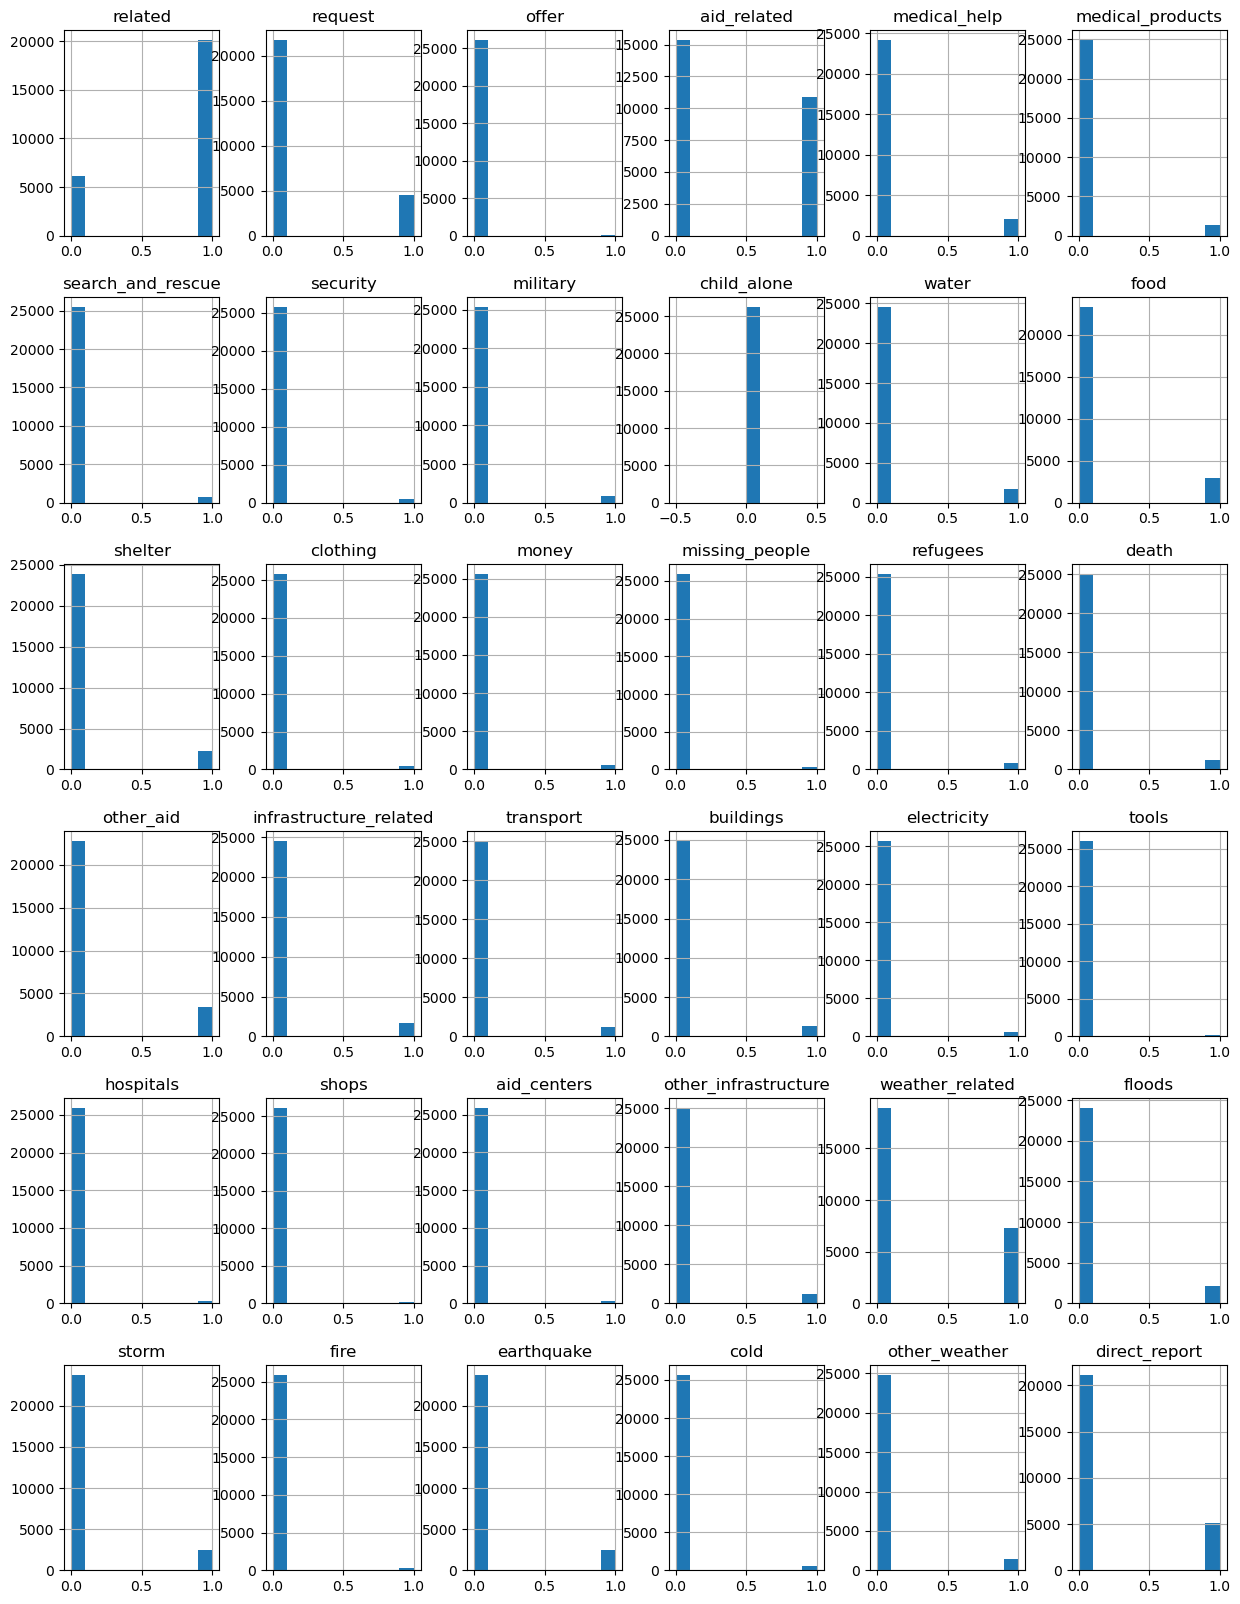

In [3]:
# Visualize the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Y.hist(ax = ax)

### 2. Write a tokenization function to process your text data

In [4]:
def tokenize(text):

    """
    Function to tokenize text.
    """

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens=[]
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [5]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [7]:
pipeline.fit(X_train, y_train)

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001BEF435AEF0>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [8]:
y_pred = pipeline.predict(X_test)

In [9]:
def test_model(y_test, y_pred):

    """
    Function to iterate through columns and call sklearn classification report on each.
    """
    for index, column in enumerate(y_test):
        print(column, classification_report(y_test[column], y_pred[:, index]))

In [10]:
test_model(y_test, y_pred)

related               precision    recall  f1-score   support

           0       0.74      0.25      0.38      1497
           1       0.81      0.97      0.89      5057

    accuracy                           0.81      6554
   macro avg       0.78      0.61      0.63      6554
weighted avg       0.80      0.81      0.77      6554

request               precision    recall  f1-score   support

           0       0.89      0.99      0.94      5428
           1       0.88      0.43      0.58      1126

    accuracy                           0.89      6554
   macro avg       0.89      0.71      0.76      6554
weighted avg       0.89      0.89      0.88      6554

offer               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6517
           1       0.00      0.00      0.00        37

    accuracy                           0.99      6554
   macro avg       0.50      0.50      0.50      6554
weighted avg       0.99      0.99      0.99      655

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


medical_products               precision    recall  f1-score   support

           0       0.95      1.00      0.97      6219
           1       0.94      0.04      0.09       335

    accuracy                           0.95      6554
   macro avg       0.94      0.52      0.53      6554
weighted avg       0.95      0.95      0.93      6554

search_and_rescue               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6381
           1       0.91      0.06      0.11       173

    accuracy                           0.97      6554
   macro avg       0.94      0.53      0.55      6554
weighted avg       0.97      0.97      0.96      6554

security               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6431
           1       0.00      0.00      0.00       123

    accuracy                           0.98      6554
   macro avg       0.49      0.50      0.50      6554
weighted avg       0.96      0

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Somtochukwu A

floods               precision    recall  f1-score   support

           0       0.95      1.00      0.97      6006
           1       0.91      0.39      0.55       548

    accuracy                           0.95      6554
   macro avg       0.93      0.69      0.76      6554
weighted avg       0.94      0.95      0.94      6554

storm               precision    recall  f1-score   support

           0       0.94      0.99      0.97      5942
           1       0.81      0.40      0.54       612

    accuracy                           0.94      6554
   macro avg       0.88      0.70      0.75      6554
weighted avg       0.93      0.94      0.93      6554

fire               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6483
           1       0.00      0.00      0.00        71

    accuracy                           0.99      6554
   macro avg       0.49      0.50      0.50      6554
weighted avg       0.98      0.99      0.98      6554

e

### 6. Improve your model
Use grid search to find better parameters. 

In [11]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function tokenize at 0x000001BEF435AEF0>)),
  ('tfidf', TfidfTransformer()),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier()))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function tokenize at 0x000001BEF435AEF0>),
 'tfidf': TfidfTransformer(),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier()),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function __main__.tokenize(text)>,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,


In [12]:
# specify parameters for grid search
parameters = {
    'clf__estimator__n_estimators' : [50, 100]
}

In [13]:
# create grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

cv

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(tokenizer=<function tokenize at 0x000001BEF435AEF0>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        MultiOutputClassifier(estimator=RandomForestClassifier()))]),
             param_grid={'clf__estimator__n_estimators': [50, 100]})

In [ ]:
cv.fit(X_train, y_train)

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
cv.best_params_

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
y_pred = cv.predict(X_test)

In [ ]:
test_model(y_test, y_pred)

In [ ]:
accuracy = (y_pred == y_test).mean()
accuracy

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [ ]:
# Adding the starting verb extractor to the TF-IDF transformer

update_pipeline = Pipeline([
    ('features', FeatureUnion ([

        ('text_pipeline', Pipeline ([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer())
        ])),
        ('starting_verb', StartingVerbExtractor ())
    ])),

    ('clf', MultiOutputClassifier(RandomForestClassifier ()))
])

# train SVM classifier
update_pipeline.fit(X_train, y_train)

In [ ]:
y_pred_update = update_pipeline.predict (X_test)
# converting to dataframe
y_pred_update = pd.DataFrame (y_pred_update, columns = y_test.columns)

### 9. Export your model as a pickle file

In [ ]:
filename = 'model.pkl'
pickle.dump(cv,open(filename,'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.